<a href="https://colab.research.google.com/github/a-kalaam/my-deep-learning-path/blob/main/image_classification_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import numpy as np
import PIL
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


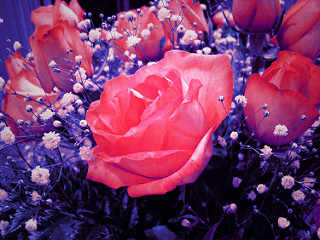

In [13]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [15]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    subset='training',
    image_size=(180, 180),
    validation_split=0.2,
    seed=123)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [16]:
val_ds=train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    subset='validation',
    image_size=(180, 180),
    validation_split=0.2,
    seed=123)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [17]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


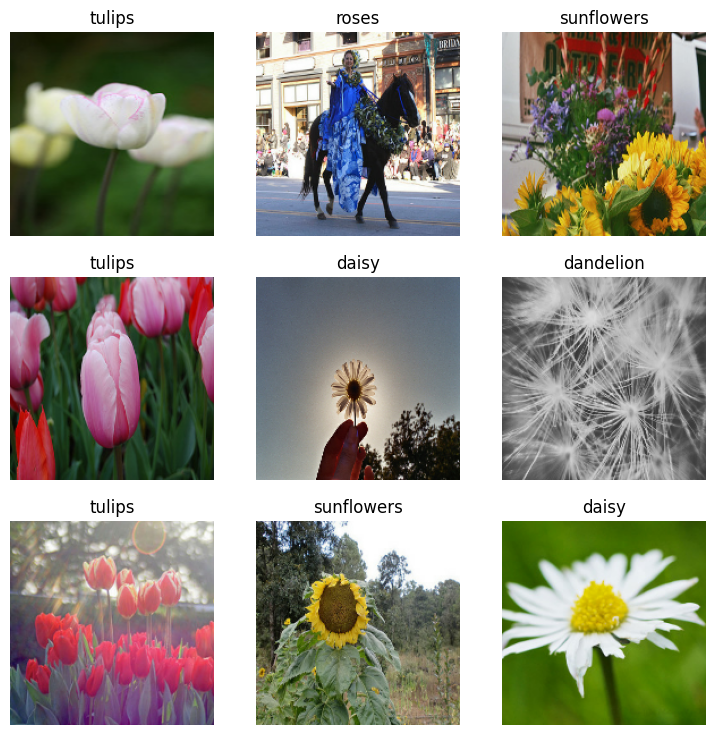

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
for imgs_btchs,lbl_btchs in train_ds:
    print(imgs_btchs.shape)
    print(lbl_btchs.shape)
    break


(32, 180, 180, 3)
(32,)


In [35]:
# Assuming `images` and `labels` are TensorFlow tensors
images_np = images.numpy()  #
labels_np = labels.numpy()  #

print(images_np.shape)
print(labels_np.shape)

(32, 180, 180, 3)
(32,)


In [38]:
normalization_layer = layers.Rescaling(1./255.5, offset=-1)

In [39]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [40]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [42]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=7
)

Epoch 1/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6362 - loss: 0.9337 - val_accuracy: 0.7153 - val_loss: 0.7688
Epoch 2/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6935 - loss: 0.8103 - val_accuracy: 0.8147 - val_loss: 0.5977
Epoch 3/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7794 - loss: 0.6754 - val_accuracy: 0.8447 - val_loss: 0.5157
Epoch 4/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8057 - loss: 0.5887 - val_accuracy: 0.8937 - val_loss: 0.3246
Epoch 5/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8940 - loss: 0.3366 - val_accuracy: 0.9414 - val_loss: 0.2382
Epoch 6/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9460 - loss: 0.1940 - val_accuracy: 0.9714 - val_loss: 0.1006
Epoch 7/7
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9770 - loss: 0.1043 - val_accuracy: 0.9932 - val_loss: 0.0550
